In [2]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### 1. Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

In [11]:
# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Pandas display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [14]:
print(os.getcwd())
print(os.listdir())  # check what’s inside current folder
print(os.listdir("data"))

d:\ML\Student-Score-Predictor
['.git', '01_Data_exploration.ipynb', 'data', 'README.md', 'requirements.txt']
['processed', 'raw']


### 2. Load data set

In [4]:
df = pd.read_csv('data/raw/StudentPerformanceFactors.csv')
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
print(f"Dataset shape: {df.shape}")
print(f"Number of students: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Dataset shape: (6607, 20)
Number of students: 6607
Number of features: 20


### 3. Data Overview

In [6]:
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Statistical Summary ---")
print(df.describe())



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence            

### 4. Data quality check


In [7]:
print("\n--- Missing Values ---")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percent': missing_percent
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df if len(missing_df) > 0 else "No missing values found!")

print("\n--- Duplicate Rows ---")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

print("\n--- Unique Values per Column ---")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


--- Missing Values ---
                          Missing_Count  Missing_Percent
Parental_Education_Level             90         1.362192
Teacher_Quality                      78         1.180566
Distance_from_Home                   67         1.014076

--- Duplicate Rows ---
Number of duplicate rows: 0

--- Unique Values per Column ---
Hours_Studied: 41 unique values
Attendance: 41 unique values
Parental_Involvement: 3 unique values
Access_to_Resources: 3 unique values
Extracurricular_Activities: 2 unique values
Sleep_Hours: 7 unique values
Previous_Scores: 51 unique values
Motivation_Level: 3 unique values
Internet_Access: 2 unique values
Tutoring_Sessions: 9 unique values
Family_Income: 3 unique values
Teacher_Quality: 3 unique values
School_Type: 2 unique values
Peer_Influence: 3 unique values
Physical_Activity: 7 unique values
Learning_Disabilities: 2 unique values
Parental_Education_Level: 3 unique values
Distance_from_Home: 3 unique values
Gender: 2 unique values
Exam_Score: 45 u

### 5. Target variable analysis

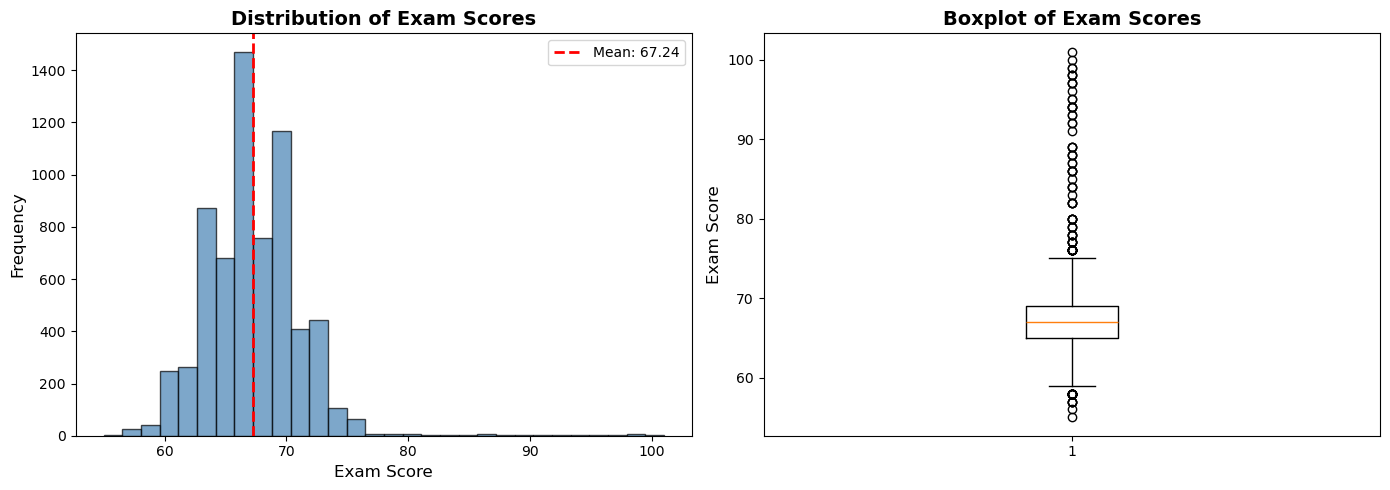


Exam Score Statistics:
count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['Exam_Score'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(df['Exam_Score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Exam_Score"].mean():.2f}')
axes[0].set_xlabel('Exam Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Exam Scores', fontsize=14, fontweight='bold')
axes[0].legend()

axes[1].boxplot(df['Exam_Score'])
axes[1].set_ylabel('Exam Score', fontsize=12)
axes[1].set_title('Boxplot of Exam Scores', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nExam Score Statistics:")
print(df['Exam_Score'].describe())